## LOADING DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings(action = 'ignore')

In [2]:
train = pd.read_csv('/content/train_s3TEQDk.csv')
test = pd.read_csv('/content/test_mSzZ8RL.csv')

In [ ]:
#pip install pandas-profiling

In [13]:
pip install pandas==0.25.3

     |████████████████████████████████| 10.4 MB 13.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.3
    Uninstalling pandas-1.3.3:
      Successfully uninstalled pandas-1.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.3 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 0.25.3 which is incompatible.
featuretools 0.27.1 requires pandas<2.0.0,>=1.2.0, but you have pandas 0.25.3 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.25.3 which is incompatible.


# PERFORMING AUTOEDA

In [ ]:
import pandas_profiling as pp
from ipywidgets import widgets

In [ ]:
pp.ProfileReport(train)

Number of variables,11
Number of observations,245725
Total Missing (%),1.1%
Total size in memory,20.6 MiB
Average record size in memory,88.0 B
Numeric,3
Categorical,6
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [ ]:
!pip install AutoViz
!pip install xlrd

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

#Instantiate the AutoViz class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


    max_rows_analyzed is smaller than dataset shape 245725...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 11)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plot

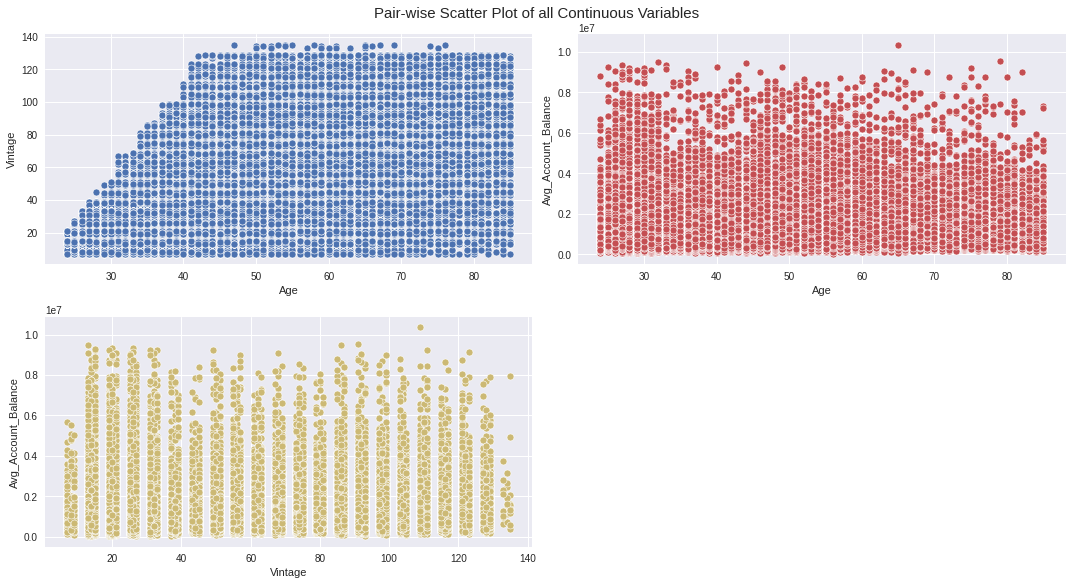

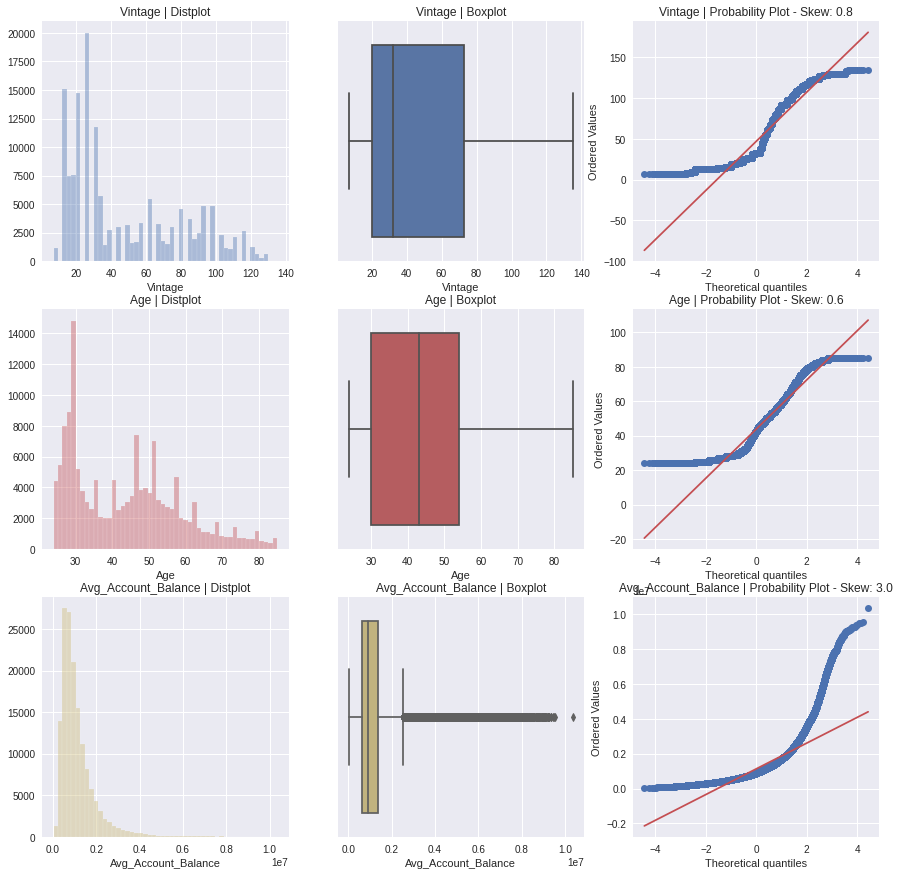

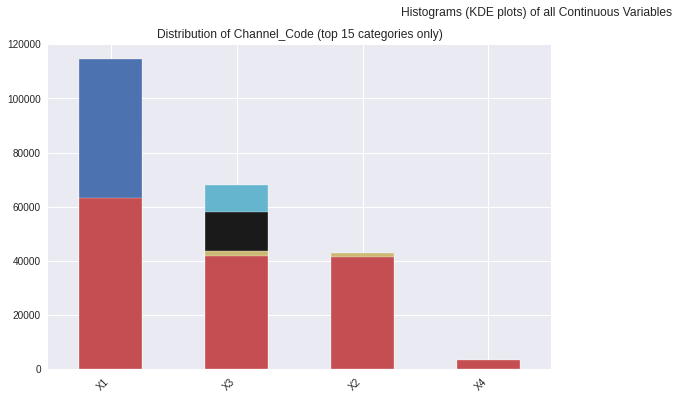

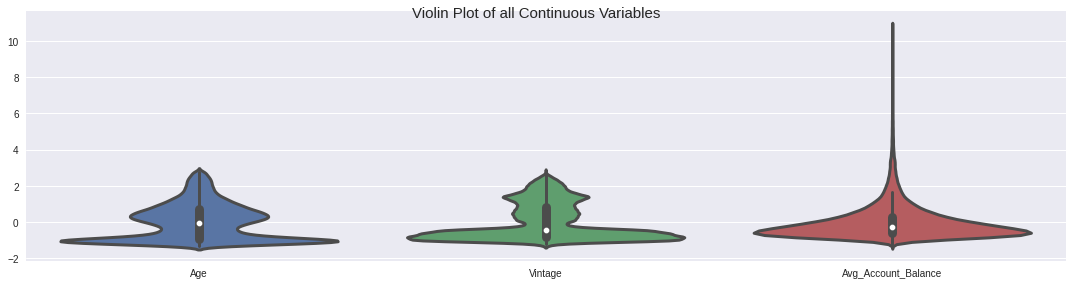

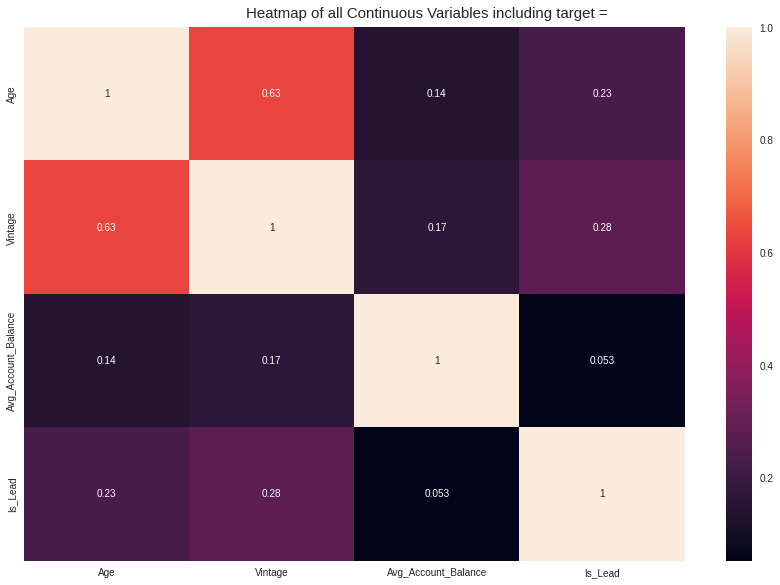

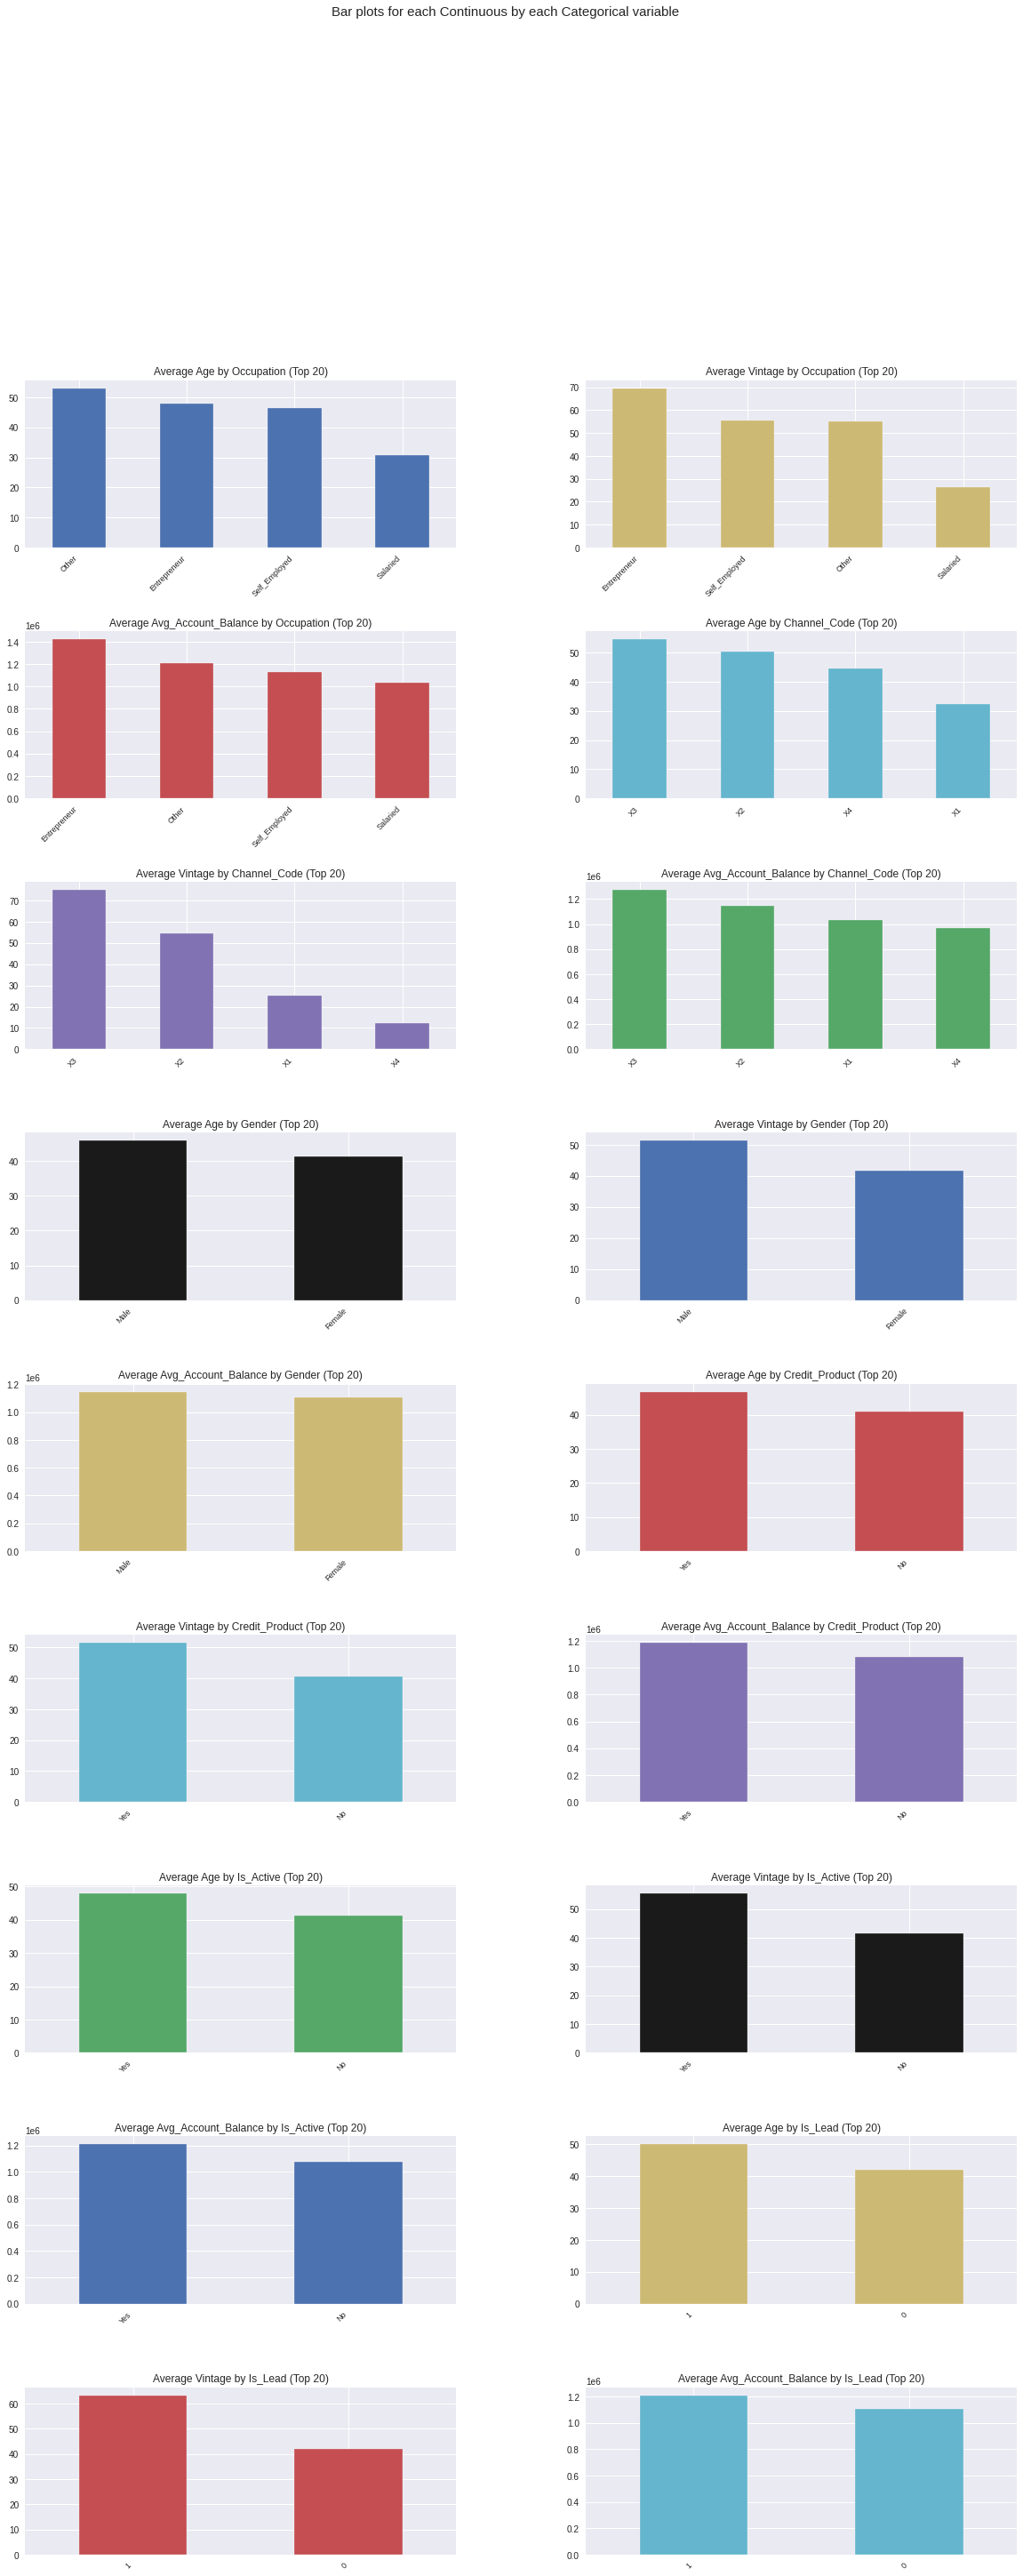

Time to run AutoViz (in seconds) = 15.565

 ###################### VISUALIZATION Completed ########################


In [ ]:
dftc = AV.AutoViz('/content/train_s3TEQDk.csv')

In [11]:
!pip install -U featuretools

     |████████████████████████████████| 327 kB 12.5 MB/s 
     |████████████████████████████████| 296 kB 49.0 MB/s 
     |████████████████████████████████| 636 kB 31.0 MB/s 
     |████████████████████████████████| 11.3 MB 40.6 MB/s 
     |████████████████████████████████| 786 kB 46.6 MB/s 
     |████████████████████████████████| 125 kB 48.6 MB/s 
     |████████████████████████████████| 779 kB 40.3 MB/s 
     |████████████████████████████████| 778 kB 33.4 MB/s 
     |████████████████████████████████| 776 kB 48.1 MB/s 
     |████████████████████████████████| 769 kB 42.0 MB/s 
     |████████████████████████████████| 766 kB 36.8 MB/s 
     |████████████████████████████████| 1.0 MB 43.2 MB/s 
     |████████████████████████████████| 722 kB 44.3 MB/s 
     |████████████████████████████████| 722 kB 37.4 MB/s 
     |████████████████████████████████| 715 kB 42.5 MB/s 
     |████████████████████████████████| 705 kB 43.9 MB/s 
     |████████████████████████████████| 699 kB 44.8 MB/s 
     |███████

FILLING MISSING VALUES AND FIXING OUTLIERS

In [3]:
train['Credit_Product'] = train['Credit_Product'].fillna('missing')
train['Credit_Product'].value_counts()

No         144357
Yes         72043
missing     29325
Name: Credit_Product, dtype: int64

In [4]:
test['Credit_Product'] = test['Credit_Product'].fillna('missing')
test['Credit_Product'].value_counts()

No         61608
Yes        31182
missing    12522
Name: Credit_Product, dtype: int64

In [5]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])

In [6]:
test['Avg_Account_Balance'] = np.log(test['Avg_Account_Balance'])

In [7]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,13.860193,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,13.274205,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,14.210464,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,13.061453,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,13.695360,No,0


In [8]:
train_numeric = train.select_dtypes(include=['int64','float64'][:])
train_numeric = train_numeric.drop(['Age'],axis=1)
train_numeric.head()

,Vintage,Avg_Account_Balance,Is_Lead
0,43,13.860193,0
1,32,13.274205,0
2,26,14.210464,0
3,19,13.061453,0
4,33,13.695360,0


In [9]:
test_numeric = test.select_dtypes(include=['int64','float64'][:])
test_numeric = test_numeric.drop(['Age'],axis=1)

CHECKING FOR MULTICOLLINEARITY

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = train_numeric.columns
vif["VIF"] = [variance_inflation_factor(train_numeric.values, i) for i in range(train_numeric.shape[1])]

In [11]:
vif.head(20)

,variables,VIF
0,Vintage,3.436810
1,Avg_Account_Balance,3.203334
2,Is_Lead,1.422481


In [12]:
train = train.drop('Age',axis=1)
test = test.drop('Age',axis=1)

### FEATURE GENERATION

In [13]:
import featuretools as ft

In [14]:
es = ft.EntitySet(id = 'credit_card')

In [15]:
ts = ft.EntitySet(id = 'credit_card_test')

In [16]:
es.entity_from_dataframe(entity_id = 'credit_card', dataframe = train, 
                         make_index = True, index = 'index')
es

Entityset: credit_card
  Entities:
    credit_card [Rows: 245725, Columns: 11]
  Relationships:
    No relationships

In [17]:
ts.entity_from_dataframe(entity_id = 'credit_card', dataframe = test, 
                         make_index = True, index = 'index')
ts

Entityset: credit_card_test
  Entities:
    credit_card [Rows: 105312, Columns: 10]
  Relationships:
    No relationships

In [18]:
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'credit_card', max_depth=1,
                                      trans_primitives = ['add_numeric', 'multiply_numeric'])

feature_matrix.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Avg_Account_Balance + Is_Lead,Avg_Account_Balance + Vintage,Is_Lead + Vintage,Avg_Account_Balance * Is_Lead,Avg_Account_Balance * Vintage,Is_Lead * Vintage
index,,,,,,,,,,,,,,,,
0,NNVBBKZB,Female,RG268,Other,X3,43,No,13.860193,No,0,13.860193,56.860193,43,0.0,595.988310,0
1,IDD62UNG,Female,RG277,Salaried,X1,32,No,13.274205,No,0,13.274205,45.274205,32,0.0,424.774563,0
2,HD3DSEMC,Female,RG268,Self_Employed,X3,26,No,14.210464,Yes,0,14.210464,40.210464,26,0.0,369.472063,0
3,BF3NC7KV,Male,RG270,Salaried,X1,19,No,13.061453,No,0,13.061453,32.061453,19,0.0,248.167616,0
4,TEASRWXV,Female,RG282,Salaried,X1,33,No,13.695360,No,0,13.695360,46.695360,33,0.0,451.946883,0


In [19]:
feature_matrix_test, feature_defs_test = ft.dfs(entityset = ts, target_entity = 'credit_card', max_depth=1,
                                      trans_primitives = ['add_numeric', 'multiply_numeric'])

feature_matrix_test.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Avg_Account_Balance + Vintage,Avg_Account_Balance * Vintage
index,,,,,,,,,,,
0,VBENBARO,Male,RG254,Other,X1,25,Yes,13.517598,No,38.517598,337.939942
1,CCMEWNKY,Male,RG268,Other,X2,49,missing,13.738129,No,62.738129,673.168340
2,VK3KGA9M,Male,RG270,Salaried,X1,14,No,12.282798,No,26.282798,171.959166
3,TT8RPZVC,Male,RG272,Other,X1,33,No,13.674028,No,46.674028,451.242912
4,SHQZEYTZ,Female,RG270,Other,X1,19,No,13.395572,No,32.395572,254.515862


In [20]:
numerical_train = feature_matrix.select_dtypes(include=['int64','float64'][:])
numerical_test = feature_matrix_test.select_dtypes(include=['int64','float64'][:])
numerical_train.head()

,Vintage,Avg_Account_Balance,Is_Lead,Avg_Account_Balance + Is_Lead,Avg_Account_Balance + Vintage,Is_Lead + Vintage,Avg_Account_Balance * Is_Lead,Avg_Account_Balance * Vintage,Is_Lead * Vintage
index,,,,,,,,,
0,43,13.860193,0,13.860193,56.860193,43,0.0,595.988310,0
1,32,13.274205,0,13.274205,45.274205,32,0.0,424.774563,0
2,26,14.210464,0,14.210464,40.210464,26,0.0,369.472063,0
3,19,13.061453,0,13.061453,32.061453,19,0.0,248.167616,0
4,33,13.695360,0,13.695360,46.695360,33,0.0,451.946883,0


In [21]:
numerical_train = numerical_train.drop(['Avg_Account_Balance','Vintage','Is_Lead'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = numerical_train.columns
vif["VIF"] = [variance_inflation_factor(numerical_train.values, i) for i in range(numerical_train.shape[1])]
vif.head(20)

,variables,VIF
0,Avg_Account_Balance + Is_Lead,1.523440e+05
1,Avg_Account_Balance + Vintage,3.685798e+06
2,Is_Lead + Vintage,2.508324e+06
3,Avg_Account_Balance * Is_Lead,7.539525e+02
4,Avg_Account_Balance * Vintage,7.041652e+02
5,Is_Lead * Vintage,6.471527e+00


In [22]:
numerical_test = numerical_test.drop(['Avg_Account_Balance','Vintage'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_test = pd.DataFrame()
vif_test["variables"] = numerical_test.columns
vif_test["VIF"] = [variance_inflation_factor(numerical_test.values, i) for i in range(numerical_test.shape[1])]

In [23]:
train['Avg_Account_Balance + Vintage'] = numerical_train['Avg_Account_Balance + Vintage']
train['Avg_Account_Balance * Vintage']= numerical_train['Avg_Account_Balance * Vintage']
test['Avg_Account_Balance + Vintage'] = numerical_test['Avg_Account_Balance + Vintage']
test['Avg_Account_Balance * Vintage']= numerical_test['Avg_Account_Balance * Vintage']

In [24]:
train = train.drop(['Avg_Account_Balance','Vintage'],axis=1)
test = test.drop(['Avg_Account_Balance','Vintage'],axis=1)

In [25]:
train.head()

,index,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Is_Lead,Avg_Account_Balance + Vintage,Avg_Account_Balance * Vintage
0,0,NNVBBKZB,Female,RG268,Other,X3,No,No,0,56.860193,595.988310
1,1,IDD62UNG,Female,RG277,Salaried,X1,No,No,0,45.274205,424.774563
2,2,HD3DSEMC,Female,RG268,Self_Employed,X3,No,Yes,0,40.210464,369.472063
3,3,BF3NC7KV,Male,RG270,Salaried,X1,No,No,0,32.061453,248.167616
4,4,TEASRWXV,Female,RG282,Salaried,X1,No,No,0,46.695360,451.946883


In [26]:
test.head()

,index,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Avg_Account_Balance + Vintage,Avg_Account_Balance * Vintage
0,0,VBENBARO,Male,RG254,Other,X1,Yes,No,38.517598,337.939942
1,1,CCMEWNKY,Male,RG268,Other,X2,missing,No,62.738129,673.168340
2,2,VK3KGA9M,Male,RG270,Salaried,X1,No,No,26.282798,171.959166
3,3,TT8RPZVC,Male,RG272,Other,X1,No,No,46.674028,451.242912
4,4,SHQZEYTZ,Female,RG270,Other,X1,No,No,32.395572,254.515862


In [27]:
le = LabelEncoder()
train['Gender'] = le.fit_transform(train['Gender'])
train['Region_Code'] = le.fit_transform(train['Region_Code'])
train['Occupation'] = le.fit_transform(train['Occupation'])
train['Channel_Code'] = le.fit_transform(train['Channel_Code'])
train['Is_Active'] = le.fit_transform(train['Is_Active'])
train['Credit_Product'] = le.fit_transform(train['Credit_Product'])

In [28]:
le = LabelEncoder()
test['Gender'] = le.fit_transform(test['Gender'])
test['Region_Code'] = le.fit_transform(test['Region_Code'])
test['Occupation'] = le.fit_transform(test['Occupation'])
test['Channel_Code'] = le.fit_transform(test['Channel_Code'])
test['Is_Active'] = le.fit_transform(test['Is_Active'])
test['Credit_Product'] = le.fit_transform(test['Credit_Product'])

In [29]:
train.head()

,index,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Is_Lead,Avg_Account_Balance + Vintage,Avg_Account_Balance * Vintage
0,0,NNVBBKZB,0,18,1,2,0,0,0,56.860193,595.988310
1,1,IDD62UNG,0,27,2,0,0,0,0,45.274205,424.774563
2,2,HD3DSEMC,0,18,3,2,0,1,0,40.210464,369.472063
3,3,BF3NC7KV,1,20,2,0,0,0,0,32.061453,248.167616
4,4,TEASRWXV,0,32,2,0,0,0,0,46.695360,451.946883


In [30]:
train = train.drop(['ID'],axis=1)

In [31]:
test = test.drop(['ID'],axis=1)

In [32]:
train_x = train.drop(['Is_Lead'],axis=1)
train_y = train['Is_Lead']

In [33]:
x = train.iloc[:,:20]

In [34]:
train_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Lead, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(train_x,train_y,random_state=53)

MIN-MAX SCALING

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = train_x.columns

In [37]:
train_x

,index,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Avg_Account_Balance + Vintage,Avg_Account_Balance * Vintage
60236,60236,1,4,2,0,0,1,27.259460,185.372983
93172,93172,1,3,3,1,0,0,53.077810,549.034598
55009,55009,1,19,2,1,1,1,105.658665,1256.597172
106554,106554,1,14,2,0,0,1,43.908061,400.149880
165185,165185,1,33,3,2,0,0,64.130050,706.502523
...,...,...,...,...,...,...,...,...,...
177915,177915,1,34,3,2,2,0,26.043106,169.560376
55717,55717,0,18,2,0,0,1,27.512527,189.175373
35701,35701,1,34,3,1,1,0,57.138997,607.976889
189213,189213,1,3,1,2,1,0,110.239303,1284.212429


In [38]:
train_x = scaler.fit_transform(train_x)
val_x = scaler.transform(val_x)

## LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import f1_score, accuracy_score, precision_score,roc_auc_score

In [40]:
logistic_param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [44]:
logit = LR()
logit.fit(train_x,train_y)
logit_train_preds = logit.predict(train_x)
k1 = roc_auc_score(logit_train_preds, train_y)
logit_test_preds = logit.predict(val_x)
k = roc_auc_score(logit_test_preds, val_y)
print('Test ROC_AUC Score    ', k )
print('Train ROC_AUC Score    ', k1 )

Test ROC_AUC Score     0.8222739127012219
Train ROC_AUC Score     0.8185323636963786


## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [46]:
for i in range(1,10):
  clf = KNN(n_neighbors = i)
  clf.fit(train_x, train_y)
  knn_train_preds = clf.predict(train_x)
  k1 = roc_auc_score(knn_train_preds, train_y)
  knn_test_predict = clf.predict(val_x)
  k = roc_auc_score(knn_test_predict, val_y)
  print('Train ROC_AUC Score    ', k1 )
  print('Test ROC_AUC Score    ', k )

Train ROC_AUC Score     1.0
Test ROC_AUC Score     0.7116908471435057
Train ROC_AUC Score     0.9394111586374847
Test ROC_AUC Score     0.7891272378857458
Train ROC_AUC Score     0.8694756518010627
Test ROC_AUC Score     0.7713829052227374
Train ROC_AUC Score     0.8771825374458189
Test ROC_AUC Score     0.8079010621710624
Train ROC_AUC Score     0.8481042700883985
Test ROC_AUC Score     0.7948835288871852
Train ROC_AUC Score     0.8585793551161124
Test ROC_AUC Score     0.8148203481676067
Train ROC_AUC Score     0.8422200181135812
Test ROC_AUC Score     0.8012095706065931
Train ROC_AUC Score     0.8520124800050257
Test ROC_AUC Score     0.8178875257532604
Train ROC_AUC Score     0.8397246752203935
Test ROC_AUC Score     0.8071337187276402


## DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt_model = DecisionTreeClassifier(max_depth=8, random_state=10)
dt_model.fit(train_x, train_y)
tree_train_predict = dt_model.predict(train_x)
k1 = roc_auc_score(tree_train_predict, train_y)
tree_test_predict = dt_model.predict(val_x)
k = roc_auc_score(tree_test_predict, val_y)
print('Train ROC_AUC Score',k1)
print('Test ROC_AUC Score',k)

Train ROC_AUC Score 0.825299607834358
Test ROC_AUC Score 0.8236323463965025


## LIGHTGBM

In [63]:
!pip install lightgbm

In [64]:
from lightgbm import LGBMClassifier

In [65]:
clf = LGBMClassifier()

clf.fit(train_x, train_y, 
        eval_set=(val_x, val_y),
        verbose = 50)

[50]	valid_0's binary_logloss: 0.349042
[100]	valid_0's binary_logloss: 0.348761


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [66]:
clf.score(train_x, train_y)

0.860531870445432

In [67]:
clf.score(val_x, val_y)

0.8564754525328819

In [68]:
train_predict = clf.predict(train_x)
test_predict = clf.predict(val_x)

In [69]:
f1_train = roc_auc_score(train_predict, train_y)
print('Training F1 Score: ', f1_train.round(2))

f1_test = roc_auc_score(test_predict, val_y)
print('Test F1 Score: ', f1_test.round(2) )

Training F1 Score:  0.84
Test F1 Score:  0.84


In [78]:
from lightgbm import LGBMClassifier

In [80]:
lgb = LGBMClassifier()

In [81]:
lgb_params = {'lambda_l1': [0.5,1,1.5,2,2.5,3,3.5,4],
              'lambda_l2': [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6.0,6.5],
              'num_leaves': [100,125,150,175,200,225,250],
              'feature_fraction': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1.0,1.1],
              'bagging_fraction': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95],
              'bagging_freq': [1,2,3,4,5,6,7,8],
              'min_child_samples': [10,15,20,22,25,27,30,35]
    }

In [82]:
random_search_lgb = RandomizedSearchCV(lgb, 
                   scoring = 'roc_auc',
                   param_distributions = lgb_params,
                   n_iter = 10,
                   cv = 5, 
                   n_jobs = -1)

In [83]:
random_search_lgb.fit(train_x, train_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'feature_fraction': [0.1, 0.2, 0.3, 0.4,
                                            

In [84]:
lgb_random_search = random_search_lgb.best_estimator_

In [85]:
lgb_train_predict = lgb_random_search.predict(train_x)
lgb_test_predict = lgb_random_search.predict(val_x)

In [86]:
roc_train = roc_auc_score(lgb_train_predict, train_y)
print('Training ROC_AUC Score: ', roc_train.round(2))

roc_test = roc_auc_score(lgb_test_predict, val_y)
print('Test ROC_AUC Score: ', roc_test.round(2) )

Training ROC_AUC Score:  0.84
Test ROC_AUC Score:  0.83


In [87]:
pred_test_lgb = lgb_random_search.predict_proba(test)[:,1]

In [90]:
pred_test_lgb

array([0.84192921, 0.77697429, 0.10392057, ..., 0.07895172, 0.0782545 ,
       0.10392057])

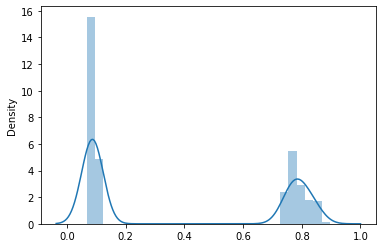

In [91]:
sns.distplot(pred_test_lgb)

## XGB CLASSIFIER

In [50]:
!pip install xgboost

In [51]:
from xgboost import XGBClassifier

In [52]:
xgb_params = {
    'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    'max_depth' : [2,3,4,5,6],
    'min_child_weight' : [1,2,3,5,10],
    'n_estimators' : [100, 200, 300, 500, 700],
    'subsample' : [0.5, 0.6, 0.7, 1], 
    'colsample_bytree' : [0.5, 0.6, 0.7, 1]

}

In [53]:
xgb = XGBClassifier(objective='binary:logistic')

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
random_search = RandomizedSearchCV(xgb, 
                   scoring = 'roc_auc',
                   param_distributions = xgb_params,
                   n_iter = 10,
                   cv = 5, 
                   n_jobs = -1)

In [56]:
random_search.cv

5

In [57]:
random_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 1],
                                      

In [58]:
results = random_search.cv_results_
results

{'mean_fit_time': array([14.90604744, 66.03195109, 29.32257094, 30.13363705, 27.74912505,
        10.62662764, 44.51057773, 13.41733379, 33.57187114, 17.90359745]),
 'mean_score_time': array([0.18305483, 0.87784448, 0.57321868, 0.52730784, 0.22853498,
        0.18177361, 0.96601081, 0.26372948, 0.54605112, 0.14423809]),
 'mean_test_score': array([0.85845066, 0.86457321, 0.86126994, 0.86834095, 0.86643351,
        0.86802454, 0.86823845, 0.86714414, 0.86765236, 0.85571312]),
 'param_colsample_bytree': masked_array(data=[0.6, 1, 0.6, 0.7, 1, 0.7, 0.6, 0.5, 0.6, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01, 0.5, 0.5, 0.2, 0.01, 0.3, 0.1, 0.3, 0.1, 0.01],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param

In [59]:
xgb_random_search = random_search.best_estimator_

In [60]:
xgb_train_predict = xgb_random_search.predict(train_x)
xgb_test_predict = xgb_random_search.predict(val_x)

In [61]:
xgb_random_search.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
roc_train = roc_auc_score(xgb_train_predict, train_y)
print('Training ROC_AUC Score: ', roc_train.round(2))

roc_test = roc_auc_score(test_predict, val_y)
print('Test ROC_AUC Score: ', roc_test.round(2) )

Training ROC_AUC Score:  0.84
Test ROC_AUC Score:  0.82


## CATBOOST

In [93]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 31 kB/s 


In [94]:
import catboost as cb

In [95]:
!pip install optuna

     |████████████████████████████████| 308 kB 12.5 MB/s 
     |████████████████████████████████| 208 kB 50.7 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |████████████████████████████████| 75 kB 4.1 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 111 kB 39.6 MB/s 
     |████████████████████████████████| 144 kB 49.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=07246327a3a665ef08dc8b24af7b6917ea488d5e00352a6ae732477d5c9da504
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [113]:
import optuna

In [114]:
def params(trial):
  param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

  if param["bootstrap_type"] == "Bayesian":
    param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
  elif param["bootstrap_type"] == "Bernoulli":
    param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

  gbm = cb.CatBoostClassifier(**param)

  gbm.fit(train_x, train_y, eval_set=[(val_x, val_y)], verbose=0, early_stopping_rounds=100)

  preds = gbm.predict(val_x)
  pred_labels = np.rint(preds)
  accuracy = roc_auc_score(val_y, pred_labels)
  f1 = f1_score(val_y,pred_labels)
  return accuracy

In [115]:
study = optuna.create_study(direction="maximize")
study.optimize(params, n_trials=50, timeout=600)

[I 2021-10-05 12:24:29,750] A new study created in memory with name: no-name-1f83454a-7bdd-4424-8d86-f12adcac268b
[I 2021-10-05 12:24:47,252] Trial 0 finished with value: 0.7407906861984805 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.05936888257518799, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.5713319580877539}. Best is trial 0 with value: 0.7407906861984805.
[I 2021-10-05 12:25:09,803] Trial 1 finished with value: 0.7221198103275105 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08050240918245695, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 8.760374228145725}. Best is trial 0 with value: 0.7407906861984805.
[I 2021-10-05 12:25:26,226] Trial 2 finished with value: 0.7215838726864322 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.015845448564430584, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.8067698

In [116]:
trial = study.best_trial
trial

FrozenTrial(number=11, values=[0.7440161601903279], datetime_start=datetime.datetime(2021, 10, 5, 12, 31, 51, 975146), datetime_complete=datetime.datetime(2021, 10, 5, 12, 33, 15, 365491), params={'objective': 'Logloss', 'colsample_bylevel': 0.09989601142423263, 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 3.555756824238825}, distributions={'objective': CategoricalDistribution(choices=('Logloss', 'CrossEntropy')), 'colsample_bylevel': UniformDistribution(high=0.1, low=0.01), 'depth': IntUniformDistribution(high=12, low=1, step=1), 'boosting_type': CategoricalDistribution(choices=('Ordered', 'Plain')), 'bootstrap_type': CategoricalDistribution(choices=('Bayesian', 'Bernoulli', 'MVS')), 'bagging_temperature': UniformDistribution(high=10.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=11, state=TrialState.COMPLETE, value=None)

In [117]:
catboost_params = {
    'objective': 'Logloss',
    'colsample_bylevel': 0.09301103173831929, 
    'depth': 7,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'bagging_temperature': 0.025934967997798708
    }

In [118]:
from catboost import CatBoostClassifier

In [119]:
catboost = CatBoostClassifier(**catboost_params)

In [120]:
catboost.fit(train_x, train_y)

Learning rate set to 0.095567
0:	learn: 0.6314514	total: 28.7ms	remaining: 28.7s
1:	learn: 0.5992600	total: 49.8ms	remaining: 24.9s
2:	learn: 0.5505491	total: 82.2ms	remaining: 27.3s
3:	learn: 0.5308492	total: 103ms	remaining: 25.6s
4:	learn: 0.5208935	total: 130ms	remaining: 25.8s
5:	learn: 0.5080961	total: 159ms	remaining: 26.4s
6:	learn: 0.4976811	total: 186ms	remaining: 26.4s
7:	learn: 0.4926182	total: 206ms	remaining: 25.5s
8:	learn: 0.4851494	total: 232ms	remaining: 25.5s
9:	learn: 0.4818946	total: 252ms	remaining: 24.9s
10:	learn: 0.4792406	total: 272ms	remaining: 24.5s
11:	learn: 0.4768382	total: 296ms	remaining: 24.4s
12:	learn: 0.4615831	total: 322ms	remaining: 24.4s
13:	learn: 0.4601870	total: 350ms	remaining: 24.7s
14:	learn: 0.4569556	total: 373ms	remaining: 24.5s
15:	learn: 0.4457433	total: 399ms	remaining: 24.5s
16:	learn: 0.4415496	total: 430ms	remaining: 24.9s
17:	learn: 0.4388625	total: 451ms	remaining: 24.6s
18:	learn: 0.4384320	total: 472ms	remaining: 24.4s
19:	lear

In [121]:
train_predict = catboost.predict(train_x)
test_predict = catboost.predict(val_x)

In [122]:
cat_train = roc_auc_score(train_predict, train_y)
print('Training ROC_AUC Score: ', cat_train.round(2))

cat_test = roc_auc_score(test_predict, val_y)
print('Test ROC_AUC Score: ', cat_test.round(2) )

Training ROC_AUC Score:  0.84
Test ROC_AUC Score:  0.84


In [123]:
catboost_params = {
    'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    'max_depth' : [2,3,4,5,6],
    'n_estimators' : [100, 200, 300, 500, 700],
    #'subsample' : [0.5, 0.6, 0.7, 1]
}

In [124]:
cat = CatBoostClassifier(loss_function='MultiClass')

In [125]:
random_search = RandomizedSearchCV(cat, 
                   scoring = 'roc_auc',
                   param_distributions = catboost_params,
                   n_iter = 10,
                   cv = 5, 
                   n_jobs = -1)

In [126]:
random_search.fit(train_x, train_y)

0:	learn: 0.6665719	total: 58ms	remaining: 28.9s
1:	learn: 0.6420341	total: 117ms	remaining: 29.2s
2:	learn: 0.6198439	total: 176ms	remaining: 29.1s
3:	learn: 0.5997302	total: 234ms	remaining: 29s
4:	learn: 0.5813365	total: 297ms	remaining: 29.4s
5:	learn: 0.5645507	total: 355ms	remaining: 29.2s
6:	learn: 0.5490059	total: 412ms	remaining: 29s
7:	learn: 0.5349121	total: 469ms	remaining: 28.9s
8:	learn: 0.5218022	total: 529ms	remaining: 28.9s
9:	learn: 0.5099166	total: 585ms	remaining: 28.6s
10:	learn: 0.4988402	total: 641ms	remaining: 28.5s
11:	learn: 0.4886987	total: 708ms	remaining: 28.8s
12:	learn: 0.4793072	total: 770ms	remaining: 28.8s
13:	learn: 0.4705558	total: 831ms	remaining: 28.8s
14:	learn: 0.4624805	total: 892ms	remaining: 28.8s
15:	learn: 0.4551005	total: 959ms	remaining: 29s
16:	learn: 0.4482731	total: 1.02s	remaining: 29s
17:	learn: 0.4419693	total: 1.08s	remaining: 28.9s
18:	learn: 0.4361238	total: 1.14s	remaining: 28.9s
19:	learn: 0.4307453	total: 1.2s	remaining: 28.8s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f8b750816d0>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [127]:
catboost_random_search = random_search.best_estimator_

In [128]:
train_predict_catboost = catboost_random_search.predict(train_x)
test_predict_catboost = catboost_random_search.predict(val_x)

In [129]:
catboost_random_search.fit(train_x, train_y)

0:	learn: 0.6665719	total: 58.8ms	remaining: 29.3s
1:	learn: 0.6420341	total: 123ms	remaining: 30.5s
2:	learn: 0.6198439	total: 180ms	remaining: 29.8s
3:	learn: 0.5997302	total: 237ms	remaining: 29.4s
4:	learn: 0.5813365	total: 300ms	remaining: 29.7s
5:	learn: 0.5645507	total: 363ms	remaining: 29.9s
6:	learn: 0.5490059	total: 424ms	remaining: 29.9s
7:	learn: 0.5349121	total: 484ms	remaining: 29.7s
8:	learn: 0.5218022	total: 554ms	remaining: 30.2s
9:	learn: 0.5099166	total: 614ms	remaining: 30.1s
10:	learn: 0.4988402	total: 674ms	remaining: 30s
11:	learn: 0.4886987	total: 734ms	remaining: 29.9s
12:	learn: 0.4793072	total: 798ms	remaining: 29.9s
13:	learn: 0.4705558	total: 861ms	remaining: 29.9s
14:	learn: 0.4624805	total: 927ms	remaining: 30s
15:	learn: 0.4551005	total: 990ms	remaining: 30s
16:	learn: 0.4482731	total: 1.05s	remaining: 30s
17:	learn: 0.4419693	total: 1.12s	remaining: 29.9s
18:	learn: 0.4361238	total: 1.18s	remaining: 29.8s
19:	learn: 0.4307453	total: 1.24s	remaining: 29.

In [130]:
catboost_train = roc_auc_score(train_predict_catboost, train_y)
print('Training ROC_AUC Score: ', catboost_train.round(2))

catboost_test = roc_auc_score(test_predict_catboost, val_y)
print('Test ROC_AUC Score: ', catboost_test.round(2) )

Training ROC_AUC Score:  0.84
Test ROC_AUC Score:  0.84


## STACKING

In [131]:
train_prediction = {
              'logistic Regression': logit_train_preds,
              'KNN': knn_train_preds,
              'Decision Tree': tree_train_predict
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,logistic Regression,KNN,Decision Tree
0,0,0,0
1,0,0,0
2,0,1,1
3,0,0,0
4,0,0,0


In [133]:
test_prediction = { 
              'logistic Regression': logit_test_preds,
              'KNN': knn_test_predict,
              'Decision Tree': tree_test_predict
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,logistic Regression,KNN,Decision Tree
0,0,0,0
1,1,1,1
2,0,0,0
3,1,1,1
4,0,0,0


In [138]:
from sklearn.svm import SVC

In [ ]:
model = SVC()
model.fit(train_predictions, train_y)
model.score(test_predictions,val_y)
train_preds = model.predict(train_predictions)
k1 = roc_auc_score(train_preds, train_y)
test_preds = model.predict(test_predictions)
k = roc_auc_score(test_preds, val_y)
print('Test ROC_AUC Score    ', k )
print('Train ROC_AUC Score    ', k1 )

STEPS USED:


*   Loading Data
*   Auto EDA using pandas_profiling and auto_viz
*   Treating Missing Values and Fixing Outliers
*   Feature Generation using Feature tools
*   Checking For multicollinearity
*   Min-Max Scaling
*   Model Building

    *   Logistic Regression
    *   KNN
    *   Decision Trees
    *   LightGBM
    *   XGBM Boosting
    *   Catboost
*   Stacking




## RESULT

Logistic Regression Score on Validation Set:0.822

KNN Score:0.807

Decision Tree Score:0.823

LGBM Score:0.83

XGB Score:0.82

Catboost Score:0.84